<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/employee_data (1) 2.csv')
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


**HANDLING MISSING VALUES**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [5]:
data.shape

(14249, 10)

In [6]:
data = data.drop(columns=['recently_promoted', 'filed_complaint'], axis=1)

In [7]:
mode_value1 = data['department'].mode()[0]
mode_value2 = data['status'].mode()[0]

In [8]:
data['department'] = data['department'].fillna(mode_value1)
data['status'] = data['status'].fillna(mode_value2)

In [9]:
data.isnull().sum()

avg_monthly_hrs       0
department            0
last_evaluation    1532
n_projects            0
salary                0
satisfaction        181
status                0
tenure              181
dtype: int64

In [10]:
mean_value1 = data['last_evaluation'].mean()
mean_value2 = data['satisfaction'].mean()
mean_value3 = data['tenure'].mean()

In [11]:
data['last_evaluation'] = data['last_evaluation'].fillna(mean_value1)
data['satisfaction'] = data['satisfaction'].fillna(mean_value2)
data['tenure'] = data['tenure'].fillna(mean_value3)

In [12]:
data.isnull().sum()

avg_monthly_hrs    0
department         0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
status             0
tenure             0
dtype: int64

In [13]:
data.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,0.718477,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0


**EXPLORATORY DATA ANALYSIS**

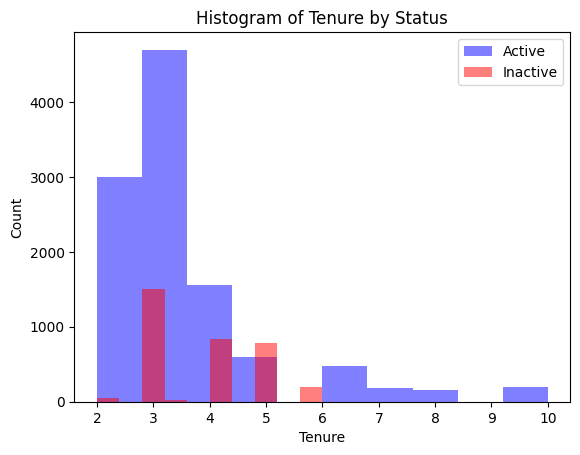

In [14]:
employed_tenure = data[data['status'] == 'Employed']['tenure']
left_tenure = data[data['status'] == 'Left']['tenure']

plt.hist(employed_tenure, bins=10, alpha=0.5, label='Active', color='blue')
plt.hist(left_tenure, bins=10, alpha=0.5, label='Inactive', color='red')

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Tenure by Status')
plt.legend()
plt.show()


Employees with tenures between 3 and 5 years has more employee attrition.

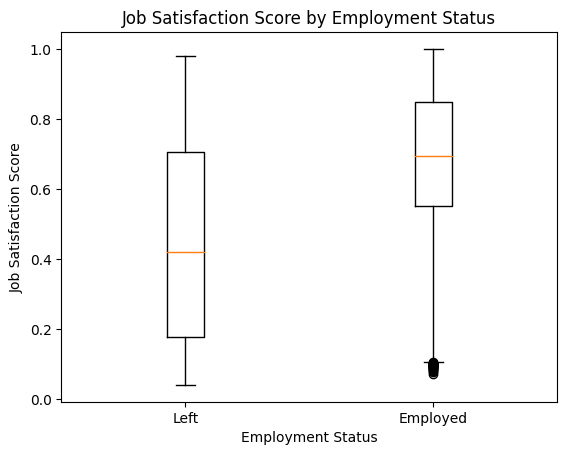

In [15]:
left_employees = data[data['status'] == 'Left']['satisfaction']
employed_employees = data[data['status'] == 'Employed']['satisfaction']

plt.boxplot([left_employees, employed_employees], labels=['Left', 'Employed'])
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.title('Job Satisfaction Score by Employment Status')
plt.show()

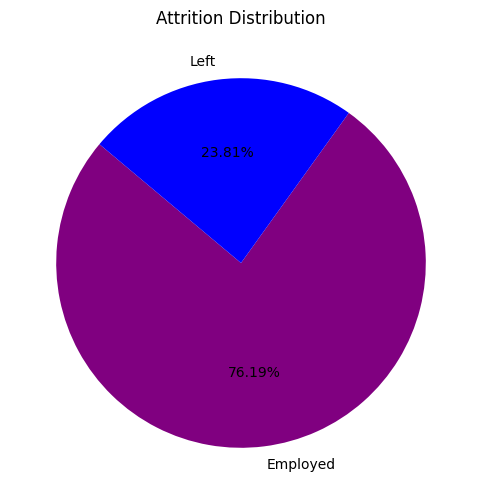

In [16]:
status_distribution = data['status'].value_counts()
percentage_left = (status_distribution['Left'] / len(data)) * 100

plt.figure(figsize=(8, 6))
plt.pie(status_distribution, labels=status_distribution.index, colors=['purple', 'blue'], autopct='%1.2f%%', startangle=140)
plt.title('Attrition Distribution')
plt.show()

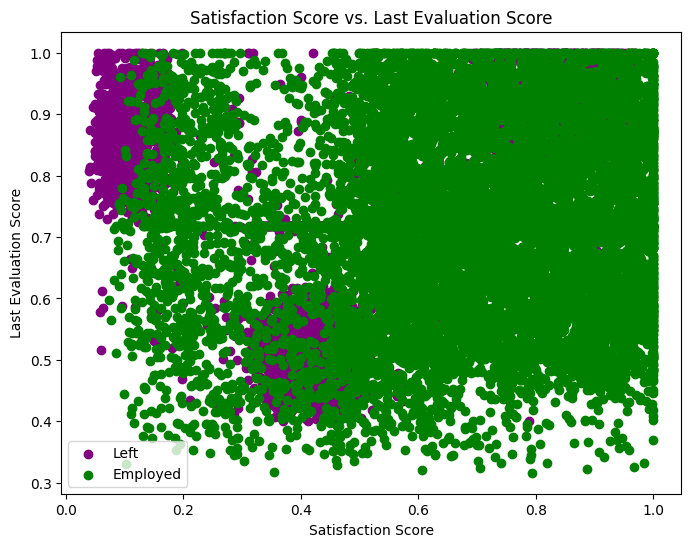

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data[data['status'] == 'Left']['satisfaction'], data[data['status'] == 'Left']['last_evaluation'], color='purple', label='Left')
plt.scatter(data[data['status'] == 'Employed']['satisfaction'], data[data['status'] == 'Employed']['last_evaluation'], color='green', label='Employed')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Satisfaction Score vs. Last Evaluation Score')
plt.legend()
plt.show()

In [18]:
correlation_left = data[data['status'] == 'Left'][['satisfaction', 'last_evaluation']].corr()
print('Correlation for employees who left:')
print(correlation_left)

Correlation for employees who left:
                 satisfaction  last_evaluation
satisfaction         1.000000         0.177968
last_evaluation      0.177968         1.000000


**DECISION TREE MODELING WITH PRUNING AND SPLIT CRITERIA**

In [19]:
from sklearn.model_selection import train_test_split
features = ['department', 'avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure']
X = data.drop(features)
Y = data['status']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

KeyError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

def build_and_visualize_tree(X, Y, criterion_name, feature_name):
    tree_classifier = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    tree_classifier.fit(X, Y)
    dot_data = tree.export_graphviz(tree_classifier, out_file=None,
                         feature_names=feature_name,
                         class_names=tree_classifier.classes_,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = graphviz.Source(dot_data)
    return tree_classifier, graph

Building decision trees with Gini impurity and entropy as criteria

In [ ]:
tree_gini, graph_gini = build_and_visualize_tree(X_train, Y_train, 'gini', features)

In [ ]:
tree_entropy, graph_entropy = build_and_visualize_tree(X_train, y_train, 'entropy')